In [1]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


#IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
#used to read csv files and perform operations on it

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


#HANDLING CATEGORICAL DATA

In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
x = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values 
labelencoder_X1 = LabelEncoder()
x[:,0] = labelencoder_X1.fit_transform(x[:,0])
x[:,1] = labelencoder_X1.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[97 1 19.0 19000.0]
 [392 1 35.0 20000.0]
 [155 0 26.0 43000.0]
 ...
 [130 0 50.0 20000.0]
 [305 1 36.0 33000.0]
 [45 0 49.0 36000.0]]


#SPLITTING OF DATA INTO TRAINING AND TEST

In [5]:
from sklearn.model_selection import train_test_split

#import model selection train test split for splitting the data into test and train for model validation.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)


#NORMALIZING DATA

In [7]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.3241206  0.         0.88095238 0.85185185]
 [0.71105528 1.         0.64285714 0.12592593]
 [0.68844221 0.         0.5        0.88148148]
 [0.73869347 0.         0.5        0.47407407]
 [0.31407035 1.         0.64285714 0.05185185]
 [0.54020101 1.         0.54761905 0.32592593]
 [0.41708543 0.         0.30952381 0.14074074]
 [0.88944724 1.         0.57142857 0.28888889]
 [0.5201005  0.         0.66666667 0.05185185]
 [0.14824121 0.         0.45238095 0.13333333]
 [0.85678392 1.         0.4047619  0.44444444]
 [0.04020101 1.         0.11904762 0.35555556]
 [0.24874372 1.         0.88095238 0.17777778]
 [0.58040201 1.         0.4047619  0.54074074]
 [0.06281407 1.         0.52380952 0.34074074]
 [0.42462312 1.         0.4047619  0.42222222]
 [0.90452261 1.         1.         0.2       ]
 [0.6281407  1.         0.45238095 0.27407407]
 [0.27638191 1.         0.73809524 0.37037037]
 [0.7361809  1.         0.66666667 0.75555556]
 [0.15577889 0.         0.42857143 0.28888889]
 [0.86180905 

#GRAPHS

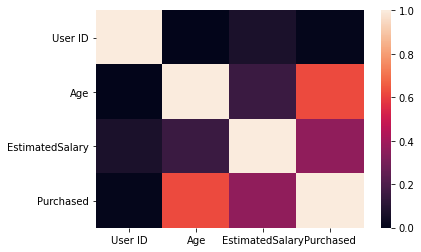

In [8]:
sns.heatmap(df.corr())

#ALGORITHM

In [9]:
knn = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

#FITTING OF TRAINING DATA

In [10]:
knn.fit(x_train,y_train)
#training or fitting the train data into the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [11]:
predictions = knn.predict(x_test)

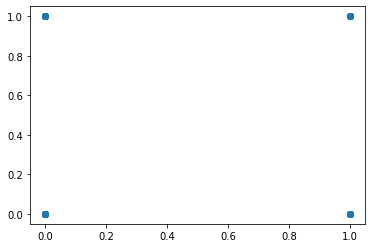

In [12]:
plt.scatter(y_test,predictions)

#EVALUATION

In [13]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.19375
MSE: 0.19375
RMSE: 0.44017042154147523


In [14]:
print(metrics.accuracy_score(y_test, predictions))

0.80625


#SAVING THE MODEL USING PICKLE LIBRARY

In [15]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(knn) 

# Load the pickled model 
lm_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
lm_from_pickle.predict(x_test) 


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix


In [16]:
from sklearn.metrics import confusion_matrix
y_train=y_train[0:160]
results =confusion_matrix(y_train, predictions)
print(results)

[[70 28]
 [41 21]]


Precision, Recall, Support, Fscore

In [17]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_train, predictions, average='macro')

(0.5296010296010296, 0.5264976958525346, 0.524117418854261, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

results =confusion_matrix(y_test, predictions)
print(results)

[[94 14]
 [17 35]]


Precision, Recall, Support, Fscore

In [19]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_test, predictions, average='macro')

(0.7805662805662805, 0.7717236467236468, 0.775758397757584, None)